### Data Sources
##### Downloaded on Oct 17th 2017 (Step 1)
 1.	Net Migration (http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aSM.POP.NETM)
 2.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H

###### Setting up Notebook and importing relevant packages.(Step 2-4)

In [77]:
import pandas as pd 
import matplotlib as mpl 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


###### Steps( 5-9) Read the file, display head , drop footnotes, change column names.

In [78]:
net_mig_df = pd.read_csv('/Users/ssharma/code/nss-ds/data-question-1-shrutijalewar/data/net_migration_minor.csv')
print('Preview of CSV Load :')
print(net_mig_df.head())
print('')
net_mig_rename = net_mig_df.drop('Value Footnotes',axis=1)
print('Preview of Dropped Footnotes :')
print(net_mig_rename.head())
print('')
net_mig_rename = net_mig_rename.rename(columns={'Country or Area': 'Country','Value':'Net_migration'})
print('Preview of Column Rename :')
print(net_mig_rename.head(6))

Preview of CSV Load :
  Country or Area  Year    Value  Value Footnotes
0     Afghanistan  2012   473007              NaN
1     Afghanistan  2007  -677497              NaN
2     Afghanistan  2002   804120              NaN
3     Afghanistan  1997  -379474              NaN
4     Afghanistan  1992  2227474              NaN

Preview of Dropped Footnotes :
  Country or Area  Year    Value
0     Afghanistan  2012   473007
1     Afghanistan  2007  -677497
2     Afghanistan  2002   804120
3     Afghanistan  1997  -379474
4     Afghanistan  1992  2227474

Preview of Column Rename :
       Country  Year  Net_migration
0  Afghanistan  2012         473007
1  Afghanistan  2007        -677497
2  Afghanistan  2002         804120
3  Afghanistan  1997        -379474
4  Afghanistan  1992        2227474
5  Afghanistan  1987       -1484185


In [79]:
net_use_df = pd.read_csv('/Users/ssharma/code/nss-ds/data-question-1-shrutijalewar/data/internet_use_minor.csv', nrows=4495)
print('Preview of CSV Load :')
print(net_use_df.head())
print('')
net_use_rename = net_use_df.drop('Value Footnotes',axis=1)
print('Preview of Dropped Footnotes :')
print(net_use_rename.head())
print('')
net_use_rename = net_use_rename.rename(columns={'Country or Area': 'Country','Value':'Inernet_users_pct'})
print('Preview of Column Rename :')
print(net_use_rename.head(6))



Preview of CSV Load :
  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN

Preview of Dropped Footnotes :
  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000

Preview of Column Rename :
       Country  Year  Inernet_users_pct
0  Afghanistan  2014           6.390000
1  Afghanistan  2013           5.900000
2  Afghanistan  2012           5.454545
3  Afghanistan  2011           5.000000
4  Afghanistan  2010           4.000000
5  Afghanistan  2009           3.550000


###### Merge the two dataframes as one.(Step 10-12) and see the first 5 and last 5 rows

In [80]:
merge_df = pd.merge(net_use_rename,net_mig_rename, how='outer', on=['Country','Year'])
print('Preview of First 5 :')
print(merge_df.head(5))
print('')
print('Preview of Last 5 :')
print(merge_df.tail(5))

Preview of First 5 :
       Country  Year  Inernet_users_pct  Net_migration
0  Afghanistan  2014           6.390000            NaN
1  Afghanistan  2013           5.900000            NaN
2  Afghanistan  2012           5.454545       473007.0
3  Afghanistan  2011           5.000000            NaN
4  Afghanistan  2010           4.000000            NaN

Preview of Last 5 :
       Country  Year  Inernet_users_pct  Net_migration
6150  Zimbabwe  1982                NaN       141524.0
6151  Zimbabwe  1977                NaN      -101516.0
6152  Zimbabwe  1972                NaN       -30360.0
6153  Zimbabwe  1967                NaN       -27996.0
6154  Zimbabwe  1962                NaN       -10001.0


###### Subset the data frame to only have data for year 2002, 2007, and 2012 (Step 13)

In [81]:
merge_df_3_yr = merge_df.loc[merge_df['Year'].isin([2002,2007,2012])]
print('Preview of 3 year subset:')
print(merge_df_3_yr.head())

Preview of 3 year subset:
        Country  Year  Inernet_users_pct  Net_migration
2   Afghanistan  2012           5.454545       473007.0
7   Afghanistan  2007           1.900000      -677497.0
12  Afghanistan  2002           0.004561       804120.0
17      Albania  2012          54.655959       -91750.0
22      Albania  2007          15.036115      -252926.0


###### Create 3 subsets each for year 2002,2007 and 2012 (Step 14)

In [82]:
merge_df_2002 = merge_df.loc[merge_df['Year']==2002]
print('Preview of year 2002:')
print(merge_df_2002.head())
print('')
merge_df_2007 = merge_df.loc[merge_df['Year']==2007]
print('Preview of year 2007:')
print(merge_df_2007.head())
print('')
merge_df_2012 = merge_df.loc[merge_df['Year']==2012]
print('Preview of year 2012:')
print(merge_df_2012.head())

Preview of year 2002:
        Country  Year  Inernet_users_pct  Net_migration
12  Afghanistan  2002           0.004561       804120.0
27      Albania  2002           0.390081      -175406.0
48      Algeria  2002           1.591641      -205228.0
71      Andorra  2002          11.260469            NaN
90       Angola  2002           0.270377       172594.0

Preview of year 2007:
        Country  Year  Inernet_users_pct  Net_migration
7   Afghanistan  2007           1.900000      -677497.0
22      Albania  2007          15.036115      -252926.0
43      Algeria  2007           9.451191      -357340.0
66      Andorra  2007          70.870000            NaN
85       Angola  2007           3.200000        85286.0

Preview of year 2012:
        Country  Year  Inernet_users_pct  Net_migration
2   Afghanistan  2012           5.454545       473007.0
17      Albania  2012          54.655959       -91750.0
38      Algeria  2012          15.228027      -143268.0
61      Andorra  2012          86.43

###### Which country had the highest percent of internet users in 2012? What was the percentage? Step 15

In [83]:
print('Highest Percent Internet Users 2012 :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2012 :
      Country  Year  Inernet_users_pct  Net_migration
1868  Iceland  2012            96.2098         -378.0


Highest percent of internet users in 2012 is **Iceland with ~96%**

###### Which country had the lowest% of internet users in 2012? What was the percentage? Step 16

In [84]:
print('Lowest Percent Internet Users :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = True).head(1))

Lowest Percent Internet Users :
                          Country  Year  Inernet_users_pct  Net_migration
1066  Dem. People's Rep. of Korea  2012                0.0            NaN


Lowest percent of internet users in 2012 is **Dem. People's Rep. of Kores with  0.0%**

###### Which country had the highest and lowest percent of internet users in 2007 and 2002? What was the percentage? Step 17 -18

In [85]:
print('Highest Percent Internet Users 2007:')
print(merge_df_2007.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2007:
      Country  Year  Inernet_users_pct  Net_migration
1873  Iceland  2007               90.6         8041.0


In [86]:
print('Highest Percent Internet Users 2007:')
print(merge_df_2007.sort_values('Inernet_users_pct', ascending = True).head(1))

Highest Percent Internet Users 2007:
                          Country  Year  Inernet_users_pct  Net_migration
1071  Dem. People's Rep. of Korea  2007                0.0            NaN


In [87]:
print('Highest Percent Internet Users 2002:')
print(merge_df_2002.sort_values('Inernet_users_pct', ascending = False).head(1))

Highest Percent Internet Users 2002:
      Country  Year  Inernet_users_pct  Net_migration
1878  Iceland  2002              79.12         3894.0


In [88]:
print('Highest Percent Internet Users 2002:')
print(merge_df_2002.sort_values('Inernet_users_pct', ascending = True).head(1))

Highest Percent Internet Users 2002:
                          Country  Year  Inernet_users_pct  Net_migration
1076  Dem. People's Rep. of Korea  2002                0.0            NaN


###### Highest and lowest Net migration in 2012 Step 19 and 20

In [89]:
print('Highest Net Migration 2012 :')
print(merge_df_2012.sort_values('Net_migration', ascending = False).head())
print('Lowest Net Migration 2012 :')
print(merge_df_2012.sort_values('Net_migration', ascending = True).head(10))

Highest Net Migration 2012 :
                                        Country  Year  Inernet_users_pct  \
5112                                High income  2012                NaN   
5650                               OECD members  2012                NaN   
5633                              North America  2012                NaN   
4951  Europe & Central Asia (all income levels)  2012                NaN   
4279                              United States  2012               79.3   

      Net_migration  
5112     15359563.0  
5650     13138424.0  
5633      6183750.0  
4951      5547385.0  
4279      5007887.0  
Lowest Net Migration 2012 :
                                           Country  Year  Inernet_users_pct  \
5395                           Lower middle income  2012                NaN   
5373                           Low & middle income  2012                NaN   
5524                                 Middle income  2012                NaN   
5847                                  

For a country in 2012 the highest net migration is for **United States with 5007887.0** and lowest is for **Syrian Arab Republic with -4029996.0 ** 

###### Scatter Plots Step 21

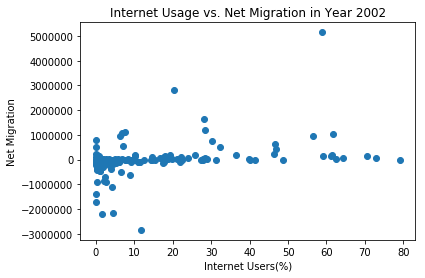

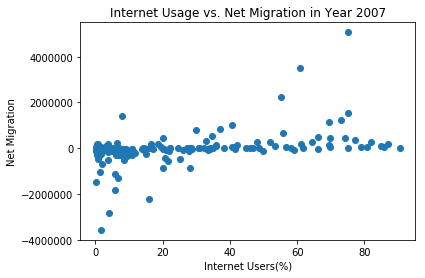

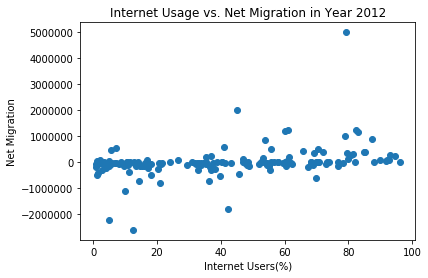

In [90]:
plt.scatter(merge_df_2002.Inernet_users_pct,merge_df_2002.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2002')
plt.show()

plt.scatter(merge_df_2007.Inernet_users_pct,merge_df_2007.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2007')
plt.show()

plt.scatter(merge_df_2012.Inernet_users_pct,merge_df_2012.Net_migration)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Internet Usage vs. Net Migration in Year 2012')
plt.show()

In [91]:
print(merge_df_2012.sort_values('Net_migration', ascending = False).head(40))

                                        Country  Year  Inernet_users_pct  \
5112                                High income  2012                NaN   
5650                               OECD members  2012                NaN   
5633                              North America  2012                NaN   
4951  Europe & Central Asia (all income levels)  2012                NaN   
4279                              United States  2012          79.300000   
4973                             European Union  2012                NaN   
4962    Europe & Central Asia (developing only)  2012                NaN   
4140                                     Turkey  2012          45.130000   
4940                                  Euro area  2012                NaN   
6053                        Upper middle income  2012                NaN   
2299                                    Lebanon  2012          61.249786   
1513                                    Germany  2012          82.349998   
3043        

**Step 22 Observations:**
Internet usage has increased in the 10 years from 2002 to 2012 the world over. Net migration the world over is generally negative for countries and categories with less internet usage. The categories with higher proportion of internet use also have generally positive net migrations indicating free mobility. That may possibly be because of more *liberal visa/travel regulations and trade regulations*. These regions/countries have **freely available regional information and opportunity**. This is purely a hypothesis at this point proposed as a broad generalization that seems to sit well with the categories and countries observed in the list of top 40. 

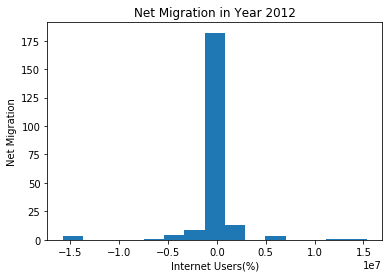

In [113]:
# for2012hist = np.array(merge_df_2012.Net_migration)
# print(merge_df_2012.Net_migration)
# print('')
# print(for2012hist)
# # for2012hist = np.nan_to_num(for2012_hist)
net_mig_2012 = net_mig_rename.loc[net_mig_rename['Year']== 2012]
plt.hist(net_mig_2012.Net_migration, bins=15)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Net Migration in Year 2012')
plt.show()

###### Look at the distribution of Internet Use for 2012. Is it unimodal? (Step 23)
**Yes**

Step 24

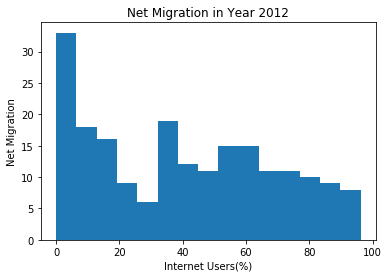

In [114]:
net_use_2012 = net_use_rename.loc[net_use_rename['Year']== 2012]
plt.hist(net_use_2012.Inernet_users_pct, bins=15)
plt.xlabel('Internet Users(%)')
plt.ylabel('Net Migration')
plt.title('Net Migration in Year 2012')
plt.show()

###### Look at the distribution of Internet Use for 2012. Is it unimodal? step 24
**No. It looks more bimodal in distribution.**

###### Step 25 Top 5 countries for Internet use

In [115]:
print('Top 5 countries for Internet use :')
print(merge_df_2012.sort_values('Inernet_users_pct', ascending = False).head(5))

Top 5 countries for Internet use :
          Country  Year  Inernet_users_pct  Net_migration
1868      Iceland  2012          96.209800         -378.0
3018       Norway  2012          94.649978       235665.0
3827       Sweden  2012          93.179988       272626.0
2882  Netherlands  2012          92.859992       110006.0
1085      Denmark  2012          92.260012        96839.0


###### Step 26 Top 5 countries for Internet use across the three years

In [120]:
merge_df_3_yr_sub = merge_df_3_yr.loc[merge_df_3_yr['Country'].isin(['Iceland','Norway','Sweden','Netherlands','Denmark'])]
print('Top 5 Internet Countries of 2012 Across Three Years :')
print(merge_df_3_yr_sub)

Top 5 Internet Countries of 2012 Across Three Years :
          Country  Year  Inernet_users_pct  Net_migration
1085      Denmark  2012          92.260012        96839.0
1090      Denmark  2007          85.030000        87989.0
1095      Denmark  2002          64.250000        46306.0
1868      Iceland  2012          96.209800         -378.0
1873      Iceland  2007          90.600000         8041.0
1878      Iceland  2002          79.120000         3894.0
2882  Netherlands  2012          92.859992       110006.0
2887  Netherlands  2007          85.820000        55674.0
2892  Netherlands  2002          61.290000       144620.0
3018       Norway  2012          94.649978       235665.0
3023       Norway  2007          86.930000       174001.0
3028       Norway  2002          72.840000        67400.0
3827       Sweden  2012          93.179988       272626.0
3832       Sweden  2007          82.010000       262453.0
3837       Sweden  2002          70.570000       141723.0
